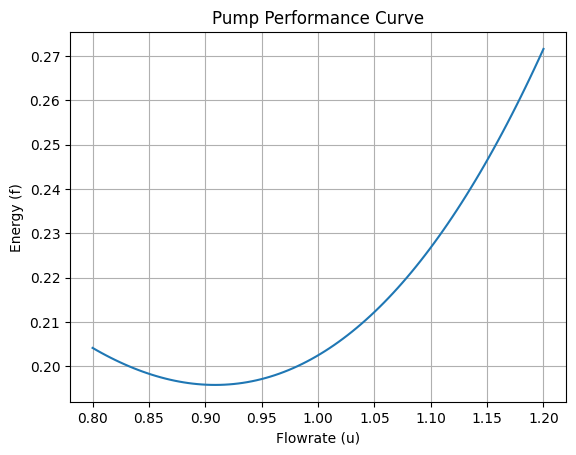

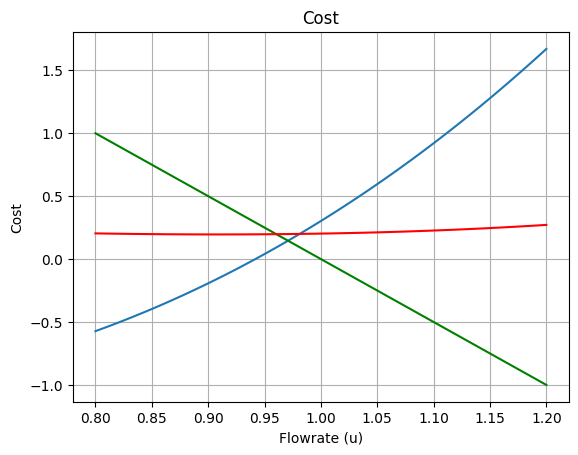

In [1]:
# generate an approximation for a simple pump performance curve given by a 3rd order polynomial fit with the flowrate as input and energy as output

def ppf_approx(u, alpha=0.15): # polynomial approximation of the energy price function due to water injection by pumps
    return (3.15 - (- 3.1 * u**3 + 3.4 * u**2 + 1.5 * u))*alpha

import numpy as np

u = np.linspace(0.8, 1.2, 100)
f = ppf_approx(u)

import matplotlib.pyplot as plt

plt.plot(u, f)
plt.xlabel('Flowrate (u)')
plt.ylabel('Energy (f)')
plt.title('Pump Performance Curve')
plt.grid(True)
plt.show()  

ro = 5.0
rwp = 0.1

qtk = np.linspace(0.8, 1.2, 100)


qro = (1-qtk)*ro 
qwp = rwp*qtk
qppf = ppf_approx(qtk)

cost = -qtk*(qro - qwp - qppf)



plt.plot(qtk, cost)
plt.plot(qtk, qro, color="green")
# plt.plot(qtk, qwp, color="blue")
plt.plot(qtk, qppf, color="red")
plt.xlabel('Flowrate (u)')
plt.ylabel('Cost')
plt.title('Cost')
plt.grid(True)
plt.show() 

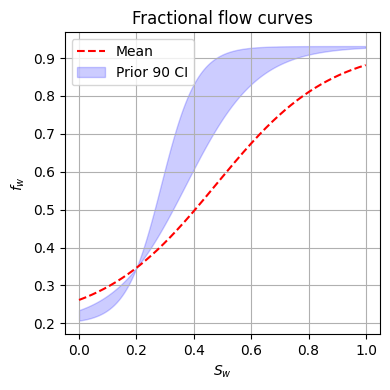

In [ ]:

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# https://perminc.com/resources/fundamentals-of-fluid-flow-in-porous-media/chapter-4-immiscible-displacement/buckley-leverett-theory/
mu_o = 5.0
mu_w = 1.0

rratio = lambda a, b, Sw : 1/(1 +  (mu_w/mu_o) * (a*np.exp(-b*(Sw-0.2))))





# a_mean = 50.0
# b_mean = 13.0

a_mean = 20.0
b_mean = 5.0

fwmin = rratio(a_mean, b_mean, 0.2)
fwmax = rratio(a_mean, b_mean, 1.0)

ratio = lambda a, b, Sw : (fwmax - fwmin)*rratio(a, b, Sw) + fwmin

bw = np.load("./data/bw.npy").flatten()
b_true = np.load("./data/b_true.npy")

Sw = np.arange(0.0, 1.0, 0.001)

fw = np.array([np.array([ratio(a_mean, b, sw) for sw in Sw]) for b in bw]).T

# fw

fw_nom = np.array([ratio(a_mean, b_mean, sw) for sw in Sw])
fw_true = np.array([ratio(a_mean, b_true, sw) for sw in Sw])

fw95 = np.percentile(fw, 95, axis=1)
fw5 = np.percentile(fw, 5, axis=1)

fw75 = np.percentile(fw, 75, axis=1)
fw25 = np.percentile(fw, 25, axis=1)

fw55 = np.percentile(fw, 55, axis=1)
fw45 = np.percentile(fw, 45, axis=1)

fwmean = np.mean(fw, axis=1)

plt.figure(figsize=(4,4))
# plt.plot(Sw, fw, color="blue", alpha=0.002)
# plt.plot(Sw, fw95, color="blue", alpha=0.2)
# plt.plot(Sw, fw5, color="blue", alpha=0.2)
plt.fill_between(Sw, fw5, fw95, color="blue", alpha=0.2)
# plt.plot(Sw, fw75, color="blue", alpha=0.2)
# plt.plot(Sw, fw25, color="blue", alpha=0.2)
# plt.fill_between(Sw, fw25, fw75, color="blue", alpha=0.2)
# plt.plot(Sw, fw55, color="blue", alpha=0.2)
# plt.plot(Sw, fw45, color="blue", alpha=0.2)
# plt.fill_between(Sw, fw45, fw55, color="blue", alpha=0.2)
# plt.plot(Sw, fwmean, color="blue", linestyle="dashed")
plt.plot(Sw, fw_nom, color="red", linestyle="dashed")
# plt.plot(Sw, fw_true, color="green", linestyle="dashed")
# plt.hlines(0.0, 0.0, 1.0, linestyles="dashed", colors="black")
# plt.hlines(1.0, 0.0, 1.0, linestyles="dashed", colors="black")
plt.title("Fractional flow curves")
plt.xlabel("$S_w$")
plt.ylabel("$f_w$")

legend_elements = [Line2D([0], [0], color="red", linestyle="dashed", label="Mean"),
                   Patch(facecolor="blue", edgecolor="blue", alpha=0.2, label="Prior 90 CI")]
plt.legend(handles=legend_elements)
plt.grid()
plt.tight_layout()
plt.savefig("fractional_flow.png")

In [3]:
ratio = lambda a, b, Sw : 1/(1 +  (mu_w/mu_o) * (a*np.exp(-b*(Sw-0.2)/0.6)))
ratio(5.0, 9.0, 0.2)

0.5